In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('../data/processed_data/IMDB_clean_transformed_data.csv')

<font size='20px' color = 'red'>-----------1. Regression on revenue------------</font>

In [4]:
df.shape

(81234, 507)

### Leaving only rows where worlwide_gross_income is defined and have a '$' in it:

In [5]:
len(df[df.worlwide_gross_income.notna()])

29880

In [6]:
df = df[df.worlwide_gross_income.notna()]

In [7]:
df = df[df.worlwide_gross_income.str.startswith('$')]

### replace dollar sign and convert it to integer

In [8]:
df.worlwide_gross_income = df.worlwide_gross_income.apply(lambda x: int(x.replace('$', '')))

In [9]:
df.worlwide_gross_income.describe()

count    2.981900e+04
mean     2.287928e+07
std      8.937314e+07
min      1.000000e+00
25%      1.212135e+05
50%      1.127097e+06
75%      8.494152e+06
max      2.797801e+09
Name: worlwide_gross_income, dtype: float64

In [10]:
df = df[df.worlwide_gross_income != 1]

In [11]:
df.worlwide_gross_income.describe()

count    2.981800e+04
mean     2.288005e+07
std      8.937454e+07
min      1.700000e+01
25%      1.212280e+05
50%      1.127280e+06
75%      8.494283e+06
max      2.797801e+09
Name: worlwide_gross_income, dtype: float64

In [12]:
df.shape

(29818, 507)

In [13]:
from sklearn import linear_model

In [14]:
regLasso = linear_model.Lasso()

In [15]:
X = df.drop(columns = ['Unnamed: 0', 'imdb_title_id', 'title', 'original_title', 'genre', 'country',\
           'language', 'director', 'writer', 'production_company', 'actors', 'budget',\
            'usa_gross_income', 'metascore', 'worlwide_gross_income', 'Good_movie'])

In [16]:
Y = df.worlwide_gross_income

In [17]:
regLasso.fit(X,Y)

/Users/sergejovsanik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3019192692519223e+19, tolerance: 2.381724922755287e+16
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
d = {X.columns[i]: regLasso.coef_[i] for i in range(0, len(X.columns))}

In [19]:
s = pd.Series(d)

In [20]:
s[s != 0].head(40)

year                    3.977117e+05
duration                2.115666e+05
avg_vote               -2.352258e+06
votes                   2.880639e+02
reviews_from_users      1.133781e+05
reviews_from_critics    1.760315e+05
n_top_directors        -8.168403e+05
n_top_writers           2.883320e+06
n_top_prodComp          3.199556e+06
n_top_actors            1.067771e+06
genre_Sport            -7.356250e+05
genre_Musical          -2.170793e+05
genre_Comedy            9.798628e+05
genre_Sci-Fi            8.906385e+04
genre_Biography        -9.704727e+06
genre_Western          -1.577002e+07
genre_Mystery          -8.545277e+06
genre_Crime            -8.879320e+06
genre_Animation         2.662861e+07
genre_Film-Noir        -1.583871e+07
genre_Adventure         3.118879e+07
genre_Family            1.017140e+07
genre_War              -4.341714e+06
genre_Music             1.982667e+06
genre_History          -3.393392e+06
genre_Fantasy           6.078881e+06
genre_Action            3.862494e+06
g

### From the code sell above, we do not think that 'avg_vote', 'votes', or reviews can cause higher revenue. Probably it is an outcome of high revenue. We want to look at the other results. Genres will be covered in next finding.

In [21]:
df.corr()['worlwide_gross_income'].nlargest(15)

worlwide_gross_income    1.000000
reviews_from_users       0.666750
votes                    0.659223
reviews_from_critics     0.578798
genre_Adventure          0.280644
country_USA              0.253362
n_top_actors             0.211181
language_English         0.183597
genre_Action             0.170183
n_top_prodComp           0.144783
genre_Sci-Fi             0.139903
n_top_writers            0.138250
duration                 0.138063
avg_vote                 0.137545
n_top_directors          0.119036
Name: worlwide_gross_income, dtype: float64

### Year:

In [22]:
df.year.describe()

count    29818.000000
mean      2005.792139
std         12.522356
min       1920.000000
25%       2002.000000
50%       2009.000000
75%       2014.000000
max       2019.000000
Name: year, dtype: float64

In [23]:
df['year_10_gap'] = pd.cut(df.year, bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])

In [24]:
graph = df.groupby('year_10_gap')['worlwide_gross_income'].mean()

In [25]:
graph = pd.DataFrame(graph).reset_index()

In [26]:
graph

,year_10_gap,worlwide_gross_income
0,"(1920, 1930]",1.519527e+06
1,"(1930, 1940]",1.096700e+07
2,"(1940, 1950]",5.586137e+06
3,"(1950, 1960]",4.115317e+06
4,"(1960, 1970]",1.032657e+07
5,"(1970, 1980]",2.401766e+07
6,"(1980, 1990]",2.116160e+07
7,"(1990, 2000]",3.354319e+07
8,"(2000, 2010]",2.047933e+07
9,"(2010, 2020]",2.340568e+07


In [27]:
import matplotlib.pyplot as plt

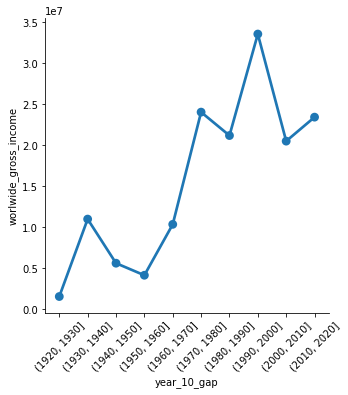

In [28]:
chart = sns.catplot(x = 'year_10_gap', y ='worlwide_gross_income', data = graph, kind = 'point')
chart.set_xticklabels(rotation=45)

### Duration:

95th percentile of the duration column is 142 minutes. It is around the **peak** on the graph.

In [29]:
df.duration.describe(percentiles = [0.95])

count    29818.000000
mean       105.222953
std         20.429578
min         45.000000
50%        101.000000
95%        142.000000
max        808.000000
Name: duration, dtype: float64

In [30]:
df['duration_bins'] = pd.cut(df.duration, bins =[45,65,92,101,114,150,200,250,300,350,400,450,808])

In [31]:
graph = df.groupby('duration_bins')['worlwide_gross_income'].mean()

In [32]:
graph = pd.DataFrame(graph).reset_index()

In [33]:
graph

,duration_bins,worlwide_gross_income
0,"(45, 65]",3.725151e+06
1,"(65, 92]",1.119616e+07
2,"(92, 101]",1.435056e+07
3,"(101, 114]",2.155407e+07
4,"(114, 150]",4.487937e+07
5,"(150, 200]",5.257979e+07
6,"(200, 250]",4.871698e+07
7,"(250, 300]",2.316163e+06
8,"(300, 350]",1.111214e+05
9,"(350, 400]",1.499423e+06


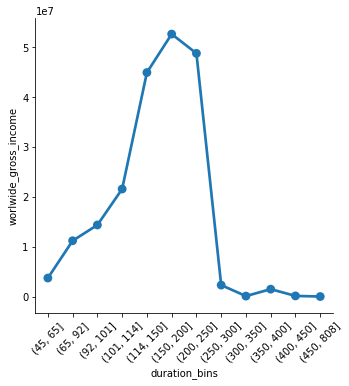

In [34]:
chart = sns.catplot(x = 'duration_bins', y ='worlwide_gross_income', data = graph, kind = 'point')
chart.set_xticklabels(rotation=45)

### Number of top directors:

In [35]:
graph = df.groupby('n_top_directors')['worlwide_gross_income'].mean()

In [36]:
graph = pd.DataFrame(graph).reset_index()

In [37]:
graph

,n_top_directors,worlwide_gross_income
0,0,1.418954e+07
1,1,3.427546e+07
2,2,6.476552e+07


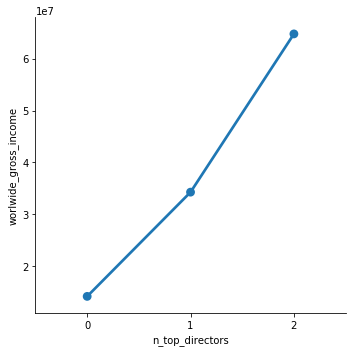

In [38]:
chart = sns.catplot(x = 'n_top_directors', y ='worlwide_gross_income', data = graph, kind = 'point')

### Number of top writers:

In [39]:
graph = df.groupby('n_top_writers')['worlwide_gross_income'].mean()

In [40]:
graph = pd.DataFrame(graph).reset_index()

In [41]:
graph

,n_top_writers,worlwide_gross_income
0,0,1.335150e+07
1,1,2.781221e+07
2,2,5.339252e+07


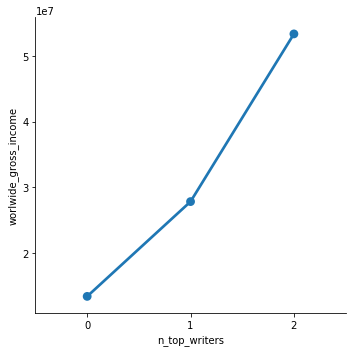

In [42]:
chart = sns.catplot(x = 'n_top_writers', y ='worlwide_gross_income', data = graph, kind = 'point')

### Number of top actors:

In [43]:
graph = df.groupby('n_top_actors')['worlwide_gross_income'].mean()

In [44]:
graph = pd.DataFrame(graph).reset_index()

In [45]:
graph

,n_top_actors,worlwide_gross_income
0,0,1.460639e+06
1,1,2.512414e+06
2,2,3.607717e+06
3,3,4.555139e+06
4,4,5.729506e+06
5,5,9.423274e+06
6,6,1.214683e+07
7,7,1.473718e+07
8,8,1.725537e+07
9,9,2.359210e+07


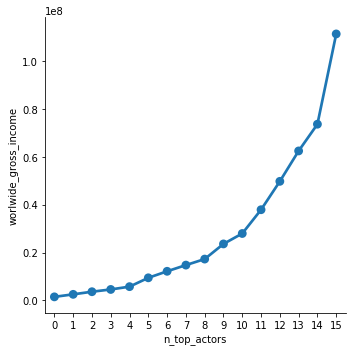

In [46]:
chart = sns.catplot(x = 'n_top_actors', y ='worlwide_gross_income', data = graph, kind = 'point')

### Number of top production companies:

In [47]:
graph = df.groupby('n_top_prodComp')['worlwide_gross_income'].mean()

In [48]:
graph = pd.DataFrame(graph).reset_index()

In [49]:
graph

,n_top_prodComp,worlwide_gross_income
0,0,9.021456e+06
1,1,3.507114e+07
2,2,9.574025e+06


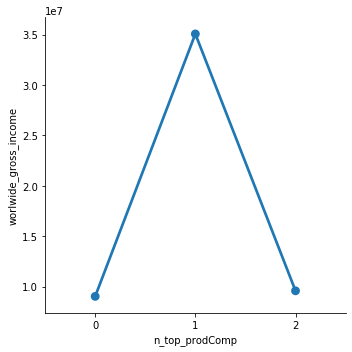

In [50]:
chart = sns.catplot(x = 'n_top_prodComp', y ='worlwide_gross_income', data = graph, kind = 'point')

Probably when 2 production companies are working on the same movie it is not beneficial.

<font size='20px' color = 'red'>-------------MANAGERIAL INSIGHT-------------</font>

**Managerial insight**: In general movies industry is growing in terms of the revenue. Do not produce movies longer than ~140 minutes. Investors probably should invest into movies where only one experienced production company is working on the movie, because second production company does not produce any additional revenue, but add additional cost to the movie. To choose the right number of experienced directors/writers/actors should be performed marginal analysis, because each situation is unique. In general the more of these people you hire, the better.